In [1]:
import os
import copy
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torchvision
from torchvision import models
from sklearn.utils import shuffle
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.font_manager
from collections import OrderedDict
from fastai import *
from fastai.vision.all import *
from fastai.callback.all import *
import torch.optim as optim
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

# Pulling the data

In [2]:
path = Path('C:/Users/rsk29/Documents/UT/Fall/AML/Final Project/food-101')
path_meta = path /'meta'
path_images = path/'images'

In [3]:
def build_data_frame(path_name, file_name, img_format = 'jpg'):
    """
    build_data_frame input the path and file name, the function will return the dataframe with two columns:
    ['label'] : image label
    ['image_file'] : image file name with directory information
    input paramters:
    path_name : path
    file_name : file name, string
    img_format : default format is jpg

    return dataframe
    """
    path_file = path_name/file_name
    file_df = pd.read_csv(path_file,delimiter='/', header=None, names=['label', 'image_file'])
    file_df['image_file'] = file_df['label'].astype(str) + '/' + file_df['image_file'].astype(str) + '.'+img_format

    return file_df

### Learning Rate finder for Alexnet and Resnet-34

In [6]:
train_df = build_data_frame(path_meta, 'train.txt')
test_df = build_data_frame(path_meta, 'test.txt')

In [7]:
batch_size = 32 
transform = transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_data = ImageDataLoaders.from_df(df=train_df, path=path_images, fn_col=1,
                                      label_col=0, valid_pct=0.2, bs=batch_size, item_tfms=Resize(224))
test_data = ImageDataLoaders.from_df(df=test_df, path=path_images, fn_col=1,
                                      label_col=0, valid_pct=0.2, bs=batch_size, item_tfms=Resize(224))

SuggestedLRs(minimum=0.003981071710586548, steep=0.010964781977236271, valley=0.0020892962347716093, slide=0.002511886414140463)

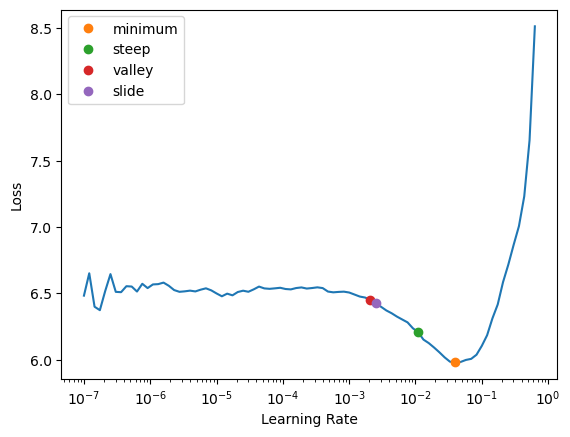

In [9]:
learn = vision_learner(train_data, resnet34, metrics=error_rate)
learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

SuggestedLRs(minimum=0.005754399299621582, steep=9.12010818865383e-07, valley=0.0014454397605732083, slide=0.00363078061491251)

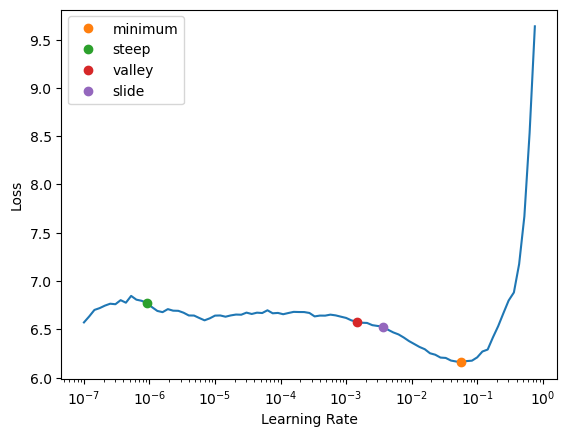

In [8]:
learn = vision_learner(train_data, alexnet, metrics=error_rate)
learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))